# 1. Setup Mario

In [18]:
# !pip install gym_super_mario_bros==7.3.0 nes_py==8.2.0

In [19]:
# Import the game
import gym_super_mario_bros
# Import the Joypad wrapper
from nes_py.wrappers import JoypadSpace
# Import the SIMPLIFIED controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [20]:
# Setup game
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [ ]:
# Create a flag - restart or not
done = True
# Loop through each frame in the game
for step in range(100000):
    # Start the game to begin with
    if done:
        # Start the gamee
        env.reset()
    # Do random actions
    state, reward, done, info = env.step(env.action_space.sample())
    # Show the game on the screen
    env.render()
# Close the game
env.close()

# 2. Preprocess Environment

In [21]:
# Install pytorch
# !pip install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio===0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

In [22]:
# Install stable baselines for RL stuff
# !pip install stable-baselines3[extra]

In [23]:
# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# Import Matplotlib to show the impact of frame stacking
from matplotlib import pyplot as plt

In [24]:
# 1. Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# 2. Simplify the controls
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. Grayscale
env = GrayScaleObservation(env, keep_dim=True)
# 4. Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])
# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last')

In [25]:
state = env.reset()

In [26]:
state, reward, done, info = env.step([5])

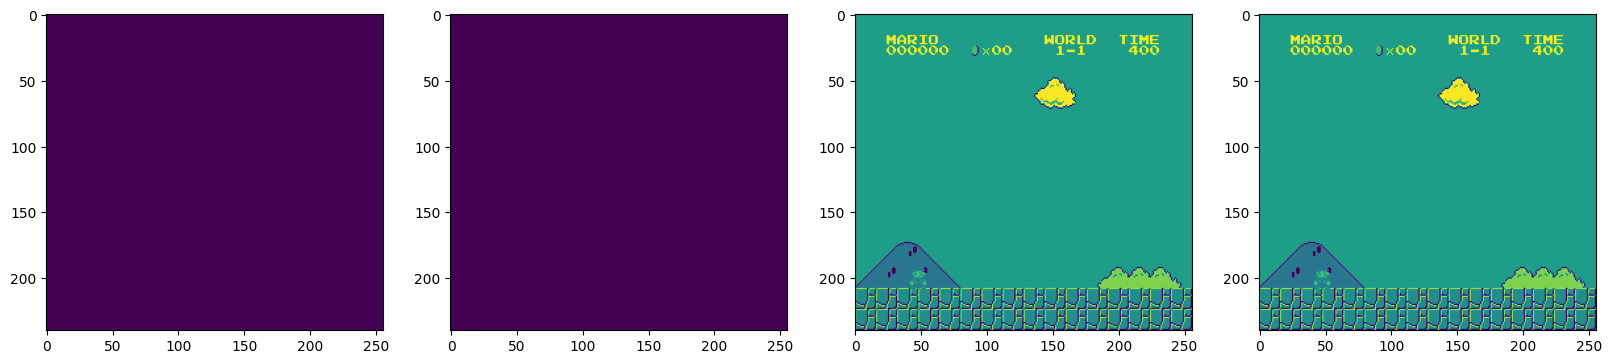

In [27]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

# 3. Train the RL Model

In [28]:
# Import os for file path management
import os
# Import PPO for algos
from stable_baselines3 import PPO
# Import Base Callback for saving models
# from stable_baselines3.common.callbacks import BaseCallback

In [29]:
# class TrainAndLoggingCallback(BaseCallback):

#     def __init__(self, check_freq, save_path, verbose=1):
#         super(TrainAndLoggingCallback, self).__init__(verbose)
#         self.check_freq = check_freq
#         self.save_path = save_path

#     def _init_callback(self):
#         if self.save_path is not None:
#             os.makedirs(self.save_path, exist_ok=True)

#     def _on_step(self):
#         if self.n_calls % self.check_freq == 0:
#             model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
#             self.model.save(model_path)

#         return True

In [30]:
# CHECKPOINT_DIR = './train/'
# LOG_DIR = './logs/'

In [31]:
# Setup model saving callback
# callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

In [33]:
# This is the AI model started
model = PPO('CnnPolicy', env, verbose=1, learning_rate=0.00001,
            n_steps=512)

Using cpu device
Wrapping the env in a VecTransposeImage.


In [34]:
# Train the AI model, this is where the AI model starts to learn
model.learn(total_timesteps=100000)

/usr/local/lib/python3.10/dist-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


----------------------------
| time/              |     |
|    fps             | 81  |
|    iterations      | 1   |
|    time_elapsed    | 6   |
|    total_timesteps | 512 |
----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 10          |
|    iterations           | 2           |
|    time_elapsed         | 100         |
|    total_timesteps      | 1024        |
| train/                  |             |
|    approx_kl            | 0.010322083 |
|    clip_fraction        | 0.0133      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.94       |
|    explained_variance   | -0.000544   |
|    learning_rate        | 1e-05       |
|    loss                 | 146         |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0103     |
|    value_loss           | 340         |
-----------------------------------------
-----------------------------------------

In [35]:
model.save('thisisatestmodel')

# 4. Test it Out

In [ ]:
# Load model
model = PPO.load('./train/best_model_1000000')

In [42]:
state = env.reset()

In [46]:
!pip install --user --upgrade git+http://github.com/pyglet/pyglet@pyglet-1.5-maintenance

  Cloning http://github.com/pyglet/pyglet (to revision pyglet-1.5-maintenance) to /tmp/pip-req-build-uh7vosia
  Running command git clone --filter=blob:none --quiet http://github.com/pyglet/pyglet /tmp/pip-req-build-uh7vosia
  Running command git checkout -b pyglet-1.5-maintenance --track origin/pyglet-1.5-maintenance
  Switched to a new branch 'pyglet-1.5-maintenance'
  Branch 'pyglet-1.5-maintenance' set up to track remote branch 'pyglet-1.5-maintenance' from 'origin'.
  Resolved http://github.com/pyglet/pyglet to commit 8511e20d25d9e89b8b1d0288b3e0bcc4e98eaa52
  Preparing metadata (setup.py) ... done
  Created wheel for pyglet: filename=pyglet-1.5.27-py3-none-any.whl size=1135294 sha256=de85984d364e8eaafd3a97f55367150c8479701bf60674cb7d45f2bf82b521c1
  Stored in directory: /tmp/pip-ephem-wheel-cache-7ju_2aup/wheels/f5/33/e2/6bf52cfee5f9b527849039a397f3565ee8cb302973ef8e1eec
Successfully built pyglet
ERROR: pip's dependency resolver does not currently take into account all the packag

In [48]:
# Start the game
state = env.reset()
# Loop through the game
while True:
  action, _ = model.predict(state)
  state, reward, done, info = env.step(action)
  env.render(mode="rgb_array")

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/base_vec_env.py:224: UserWarning: Starting from gymnasium v0.26, render modes are determined during the initialization of the environment.
                We allow to pass a mode argument to maintain a backwards compatible VecEnv API, but the mode (rgb_array)
                has to be the same as the environment render mode (None) which is not the case.
  warnings.warn(


KeyboardInterrupt: ignored